# Object Detection API (SSD MobileNet v3 Large / Small)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

### Install

Make sure you have `pycocotools` installed

In [ ]:
!pip install pycocotools

Get `tensorflow/models` or `cd` to parent directory of the repository.

In [ ]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3313, done.
remote: Counting objects: 100% (3313/3313), done.
remote: Compressing objects: 100% (2734/2734), done.
remote: Total 3313 (delta 878), reused 1392 (delta 530), pack-reused 0
Receiving objects: 100% (3313/3313), 34.29 MiB | 11.65 MiB/s, done.
Resolving deltas: 100% (878/878), done.


In [ ]:
%cd ./models/research/
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

/content/models/research
env: PYTHONPATH=/content/models/research:/content/models/research/slim


Compile protobufs and install the object_detection package

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


### Imports

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

Import the object detection module.

In [ ]:
pip install tensorflow-object-detection-api

     |████████████████████████████████| 577 kB 3.9 MB/s 
     |████████████████████████████████| 229 kB 43.5 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 138 kB 30.6 MB/s 
     |████████████████████████████████| 48 kB 5.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
     |████████████████████████████████| 3.6 MB 37.8 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=9e952c28df667c1aec65aaba7762ac83cef4e9d1cc9c40966c1b8f18e7b8d9a6
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4e3c1a0c2ca82f808a5886c5e06ec8939cc930bf986e8f5387730bf2c6dbc793
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c516

In [ ]:
pip install tf_slim

     |████████████████████████████████| 352 kB 4.3 MB/s 


In [ ]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
%cd /content/drive/MyDrive/SSD/models/research/object_detection


/content/drive/MyDrive/SSD/models/research/object_detection


In [ ]:
pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 4.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/ssd_mobilenet_v1_pets.config


Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 17514: loss = 1.7115 (0.432 sec/step)
I0405 06:58:51.482020 139728310167424 learning.py:512] global step 17514: loss = 1.7115 (0.432 sec/step)
INFO:tensorflow:global step 17515: loss = 2.0520 (0.430 sec/step)
I0405 06:58:51.914034 139728310167424 learning.py:512] global step 17515: loss = 2.0520 (0.430 sec/step)
INFO:tensorflow:global step 17516: loss = 2.3155 (0.434 sec/step)
I0405 06:58:52.349781 139728310167424 learning.py:512] global step 17516: loss = 2.3155 (0.434 sec/step)
INFO:tensorflow:global step 17517: loss = 1.5488 (0.436 sec/step)
I0405 06:58:52.789963 139728310167424 learning.py:512] global step 17517: loss = 1.5488 (0.436 sec/step)
INFO:tensorflow:global step 17518: loss = 1.6042 (0.431 sec/step)
I0405 06:58:53.223411 139728310167424 learning.py:512] global step 17518: loss = 1.6042 (0.431 sec/step)
INFO:tensorflow:global step 17519: loss = 1.6097 (0.436 sec/step)
I0405 06:58:53.661566 139728

In [ ]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path training/ssd_mobilenet_v1_pets.config --trained_checkpoint_prefix training/model.ckpt-20000 --output_directory sheet_inference_graph

Using TensorFlow backend.
Instructions for updating:
Please use `layer.__call__` method instead.
W0405 07:17:50.990945 140191728400256 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0405 07:17:52.754563 140191728400256 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0405 07:17:52.802084 140191728400256 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0405 07:17:52.849316 140191728400256 convolutional_box_predictor.py:155] depth of additional conv before box predictor: 0
INFO:tensorflow:dep

# Model preparation 

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [ ]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'training/object-detection.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

For the sake of simplicity we will test on 2 images:

In [ ]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('images/test')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('images/test/cardboard00657.jpg'),
 PosixPath('images/test/cardboard00673.jpg'),
 PosixPath('images/test/cardboard00689.jpg'),
 PosixPath('images/test/cardboard00705.jpg'),
 PosixPath('images/test/cardboard00721.jpg'),
 PosixPath('images/test/cardboard00737.jpg'),
 PosixPath('images/test/cardboard00753.jpg'),
 PosixPath('images/test/cardboard00769.jpg'),
 PosixPath('images/test/cardboard00785.jpg')]

In [ ]:
# Size, in inches, of the output images.
IMAGE_SIZE = (24, 24)

# Detection

In [ ]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, axis=0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [ ]:
def run_detection(path_to_frozen_graph, title):
  detection_graph = tf.Graph()
  with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(path_to_frozen_graph, 'rb') as fid:
      serialized_graph = fid.read()
      od_graph_def.ParseFromString(serialized_graph)
      tf.import_graph_def(od_graph_def, name='')

  plt.figure(figsize=IMAGE_SIZE)
  
  for i, image_path in enumerate(TEST_IMAGE_PATHS):
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)

    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)

    plt.subplot(3, 3, i+1)
    plt.imshow(image_np)
    plt.title(title)

In [ ]:
%matplotlib inline

Run inference.<br>
Inference using frozen_inference_graph.pb.

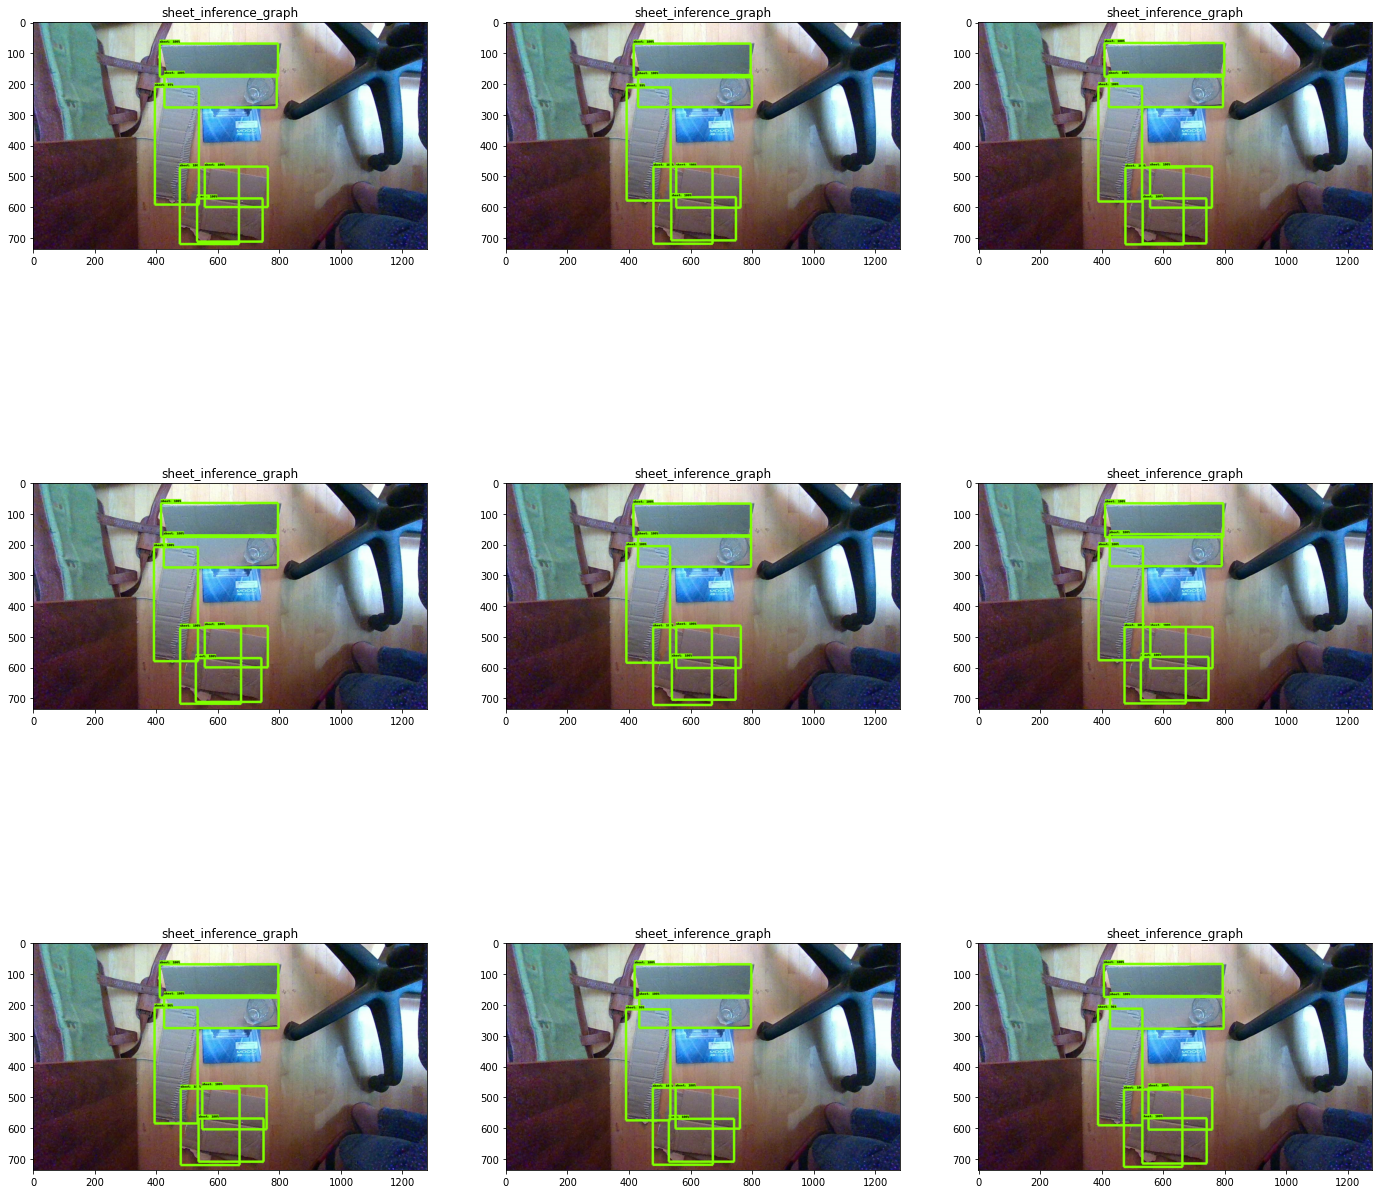

In [ ]:
run_detection('/content/drive/MyDrive/SSD/models/research/object_detection/sheet_inference_graph/frozen_inference_graph.pb', 'sheet_inference_graph')